In [1]:
import scipy.io
from scipy.io import loadmat

mat_data = scipy.io.loadmat('/kaggle/input/flowers/imagelabels.mat')
label = mat_data['labels'].tolist()[0]


In [2]:
import tarfile

# Path to the .tgz file
file_path = "/kaggle/input/flowers/102flowers.tgz"

# Extract the contents of the .tgz file
with tarfile.open(file_path, "r:gz") as tar:
    tar.extractall("/kaggle/working")  # Extract to the working directory
    

In [3]:
import os
base_dir = '/kaggle/working/'

directory = os.path.join(base_dir, 'jpg')

image_paths = []
for dirpath, dirnames, filenames in os.walk(directory):
    for filename in filenames:
        if filename.endswith('.jpg'):
            image_paths.append(os.path.join(dirpath, filename))



image_paths.sort(key=lambda x: int(os.path.basename(x).split('_')[1].split('.')[0]))


In [4]:
import pandas as pd
df = pd.DataFrame({'data': image_paths, 'labels': label})


In [5]:
df['data'].value_counts()

data
/kaggle/working/jpg/image_08189.jpg    1
/kaggle/working/jpg/image_00001.jpg    1
/kaggle/working/jpg/image_00002.jpg    1
/kaggle/working/jpg/image_00003.jpg    1
/kaggle/working/jpg/image_00004.jpg    1
                                      ..
/kaggle/working/jpg/image_00033.jpg    1
/kaggle/working/jpg/image_00034.jpg    1
/kaggle/working/jpg/image_00035.jpg    1
/kaggle/working/jpg/image_00036.jpg    1
/kaggle/working/jpg/image_00037.jpg    1
Name: count, Length: 8189, dtype: int64

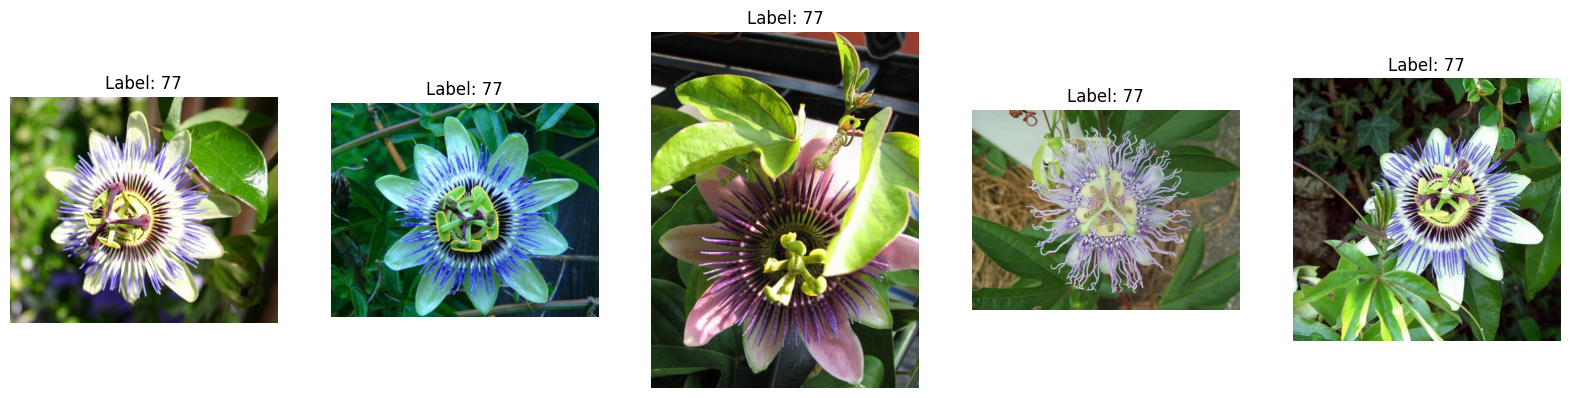

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 20))

for i, ax in enumerate(axes.flat):
    # Load and display the image
    img_path = df['data'].iloc[i]
    img = Image.open(img_path)
    
    ax.imshow(img)
    ax.set_title(f"Label: {df['labels'].iloc[i]}")
    ax.axis("off")

plt.show()

In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['data'], df['labels'], test_size=0.10, random_state=42)

In [8]:
print("Unique labels in the training set:", set(y_train))
print("Unique labels in the test set:", set(y_test))
# print("Number of classes:", num_classes)


Unique labels in the training set: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102}
Unique labels in the test set: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102}


In [9]:
y_train = y_train - 1  # Convert 1-based to 0-based labels
y_test = y_test - 1    # Convert 1-based to 0-based labels


In [10]:
print("Unique labels in the training set:", set(y_train))
print("Unique labels in the test set:", set(y_test))

Unique labels in the training set: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101}
Unique labels in the test set: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 97, 98, 99, 100, 101}


In [11]:
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images.tolist()  
        self.labels = labels.tolist() 
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path).convert('RGB')
        label = self.labels[idx]

        if self.transform:
            image = self.transform(image)

        return image,label


In [12]:
data_transforms = {
    "train": transforms.Compose([
        transforms.Resize(256),
        transforms.RandomCrop(224, padding_mode="reflect", pad_if_needed=True),
        transforms.RandomAffine(scale=(0.9, 1.1), translate=(0.1, 0.1), degrees=10),
        transforms.RandomHorizontalFlip(0.5),
        # Color augmentations
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.4),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]),
    "valid": transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]),
    "test": transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]),
}

In [13]:
train_dataset = CustomDataset(X_train,y_train, transform=data_transforms['train'])
test_dataset = CustomDataset(X_test,y_test, transform=data_transforms['test'])

batch_size = 32
data_loaders = {
    'train': DataLoader(train_dataset, batch_size=batch_size, shuffle=True),
    'test': DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
}

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


In [15]:
from torchvision.models import resnet50, ResNet50_Weights


model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)
num_classes = len(set(y_train))  
model.fc = nn.Linear(model.fc.in_features, num_classes)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 175MB/s]


In [16]:
num_classes

102

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
print("Model output features:", model.fc.out_features)
print("Expected number of classes:", num_classes)


Model output features: 102
Expected number of classes: 102


In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [20]:
def train_model(model, data_loaders, criterion, optimizer, num_epochs=10):
    model.train()  # Set model to training mode

    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in data_loaders['train']:
            inputs, labels = inputs.to(device), labels.to(device)
            #print("input - " ,inputs.shape)
            #print("labels - " ,labels.shape)
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # Update loss and accuracy
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
        
        epoch_loss = running_loss / len(data_loaders['train'])
        epoch_acc = correct / total
        
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")


In [21]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

def evaluate_model(model, data_loader, device):
    model.eval()  # Set model to evaluation mode
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    accuracy = (torch.tensor(all_preds) == torch.tensor(all_labels)).sum().item() / len(all_labels)
    
    # Set zero_division to 1 to avoid UndefinedMetricWarning
    precision = precision_score(all_labels, all_preds, average='weighted', zero_division=1)  
    recall = recall_score(all_labels, all_preds, average='weighted', zero_division=1)
    f1 = f1_score(all_labels, all_preds, average='weighted')
    
    cm = confusion_matrix(all_labels, all_preds)
    
    # Print the metrics
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    return accuracy, precision, recall, f1, cm


In [22]:
train_model(model, data_loaders, criterion, optimizer, num_epochs=15)

Epoch 1/15, Loss: 1.9926, Accuracy: 0.5166
Epoch 2/15, Loss: 0.6896, Accuracy: 0.8042
Epoch 3/15, Loss: 0.4598, Accuracy: 0.8710
Epoch 4/15, Loss: 0.3490, Accuracy: 0.9001
Epoch 5/15, Loss: 0.2872, Accuracy: 0.9157
Epoch 6/15, Loss: 0.2516, Accuracy: 0.9221
Epoch 7/15, Loss: 0.2117, Accuracy: 0.9342
Epoch 8/15, Loss: 0.1939, Accuracy: 0.9418
Epoch 9/15, Loss: 0.1971, Accuracy: 0.9411
Epoch 10/15, Loss: 0.1829, Accuracy: 0.9437
Epoch 11/15, Loss: 0.1524, Accuracy: 0.9555
Epoch 12/15, Loss: 0.1549, Accuracy: 0.9529
Epoch 13/15, Loss: 0.1274, Accuracy: 0.9598
Epoch 14/15, Loss: 0.1424, Accuracy: 0.9550
Epoch 15/15, Loss: 0.1181, Accuracy: 0.9649


In [23]:
accuracy, precision, recall, f1, cm = evaluate_model(model, data_loaders['test'], device)

Test Accuracy: 0.9438
Precision: 0.9508
Recall: 0.9438
F1 Score: 0.9399


In [24]:
cm

array([[4, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 5]])

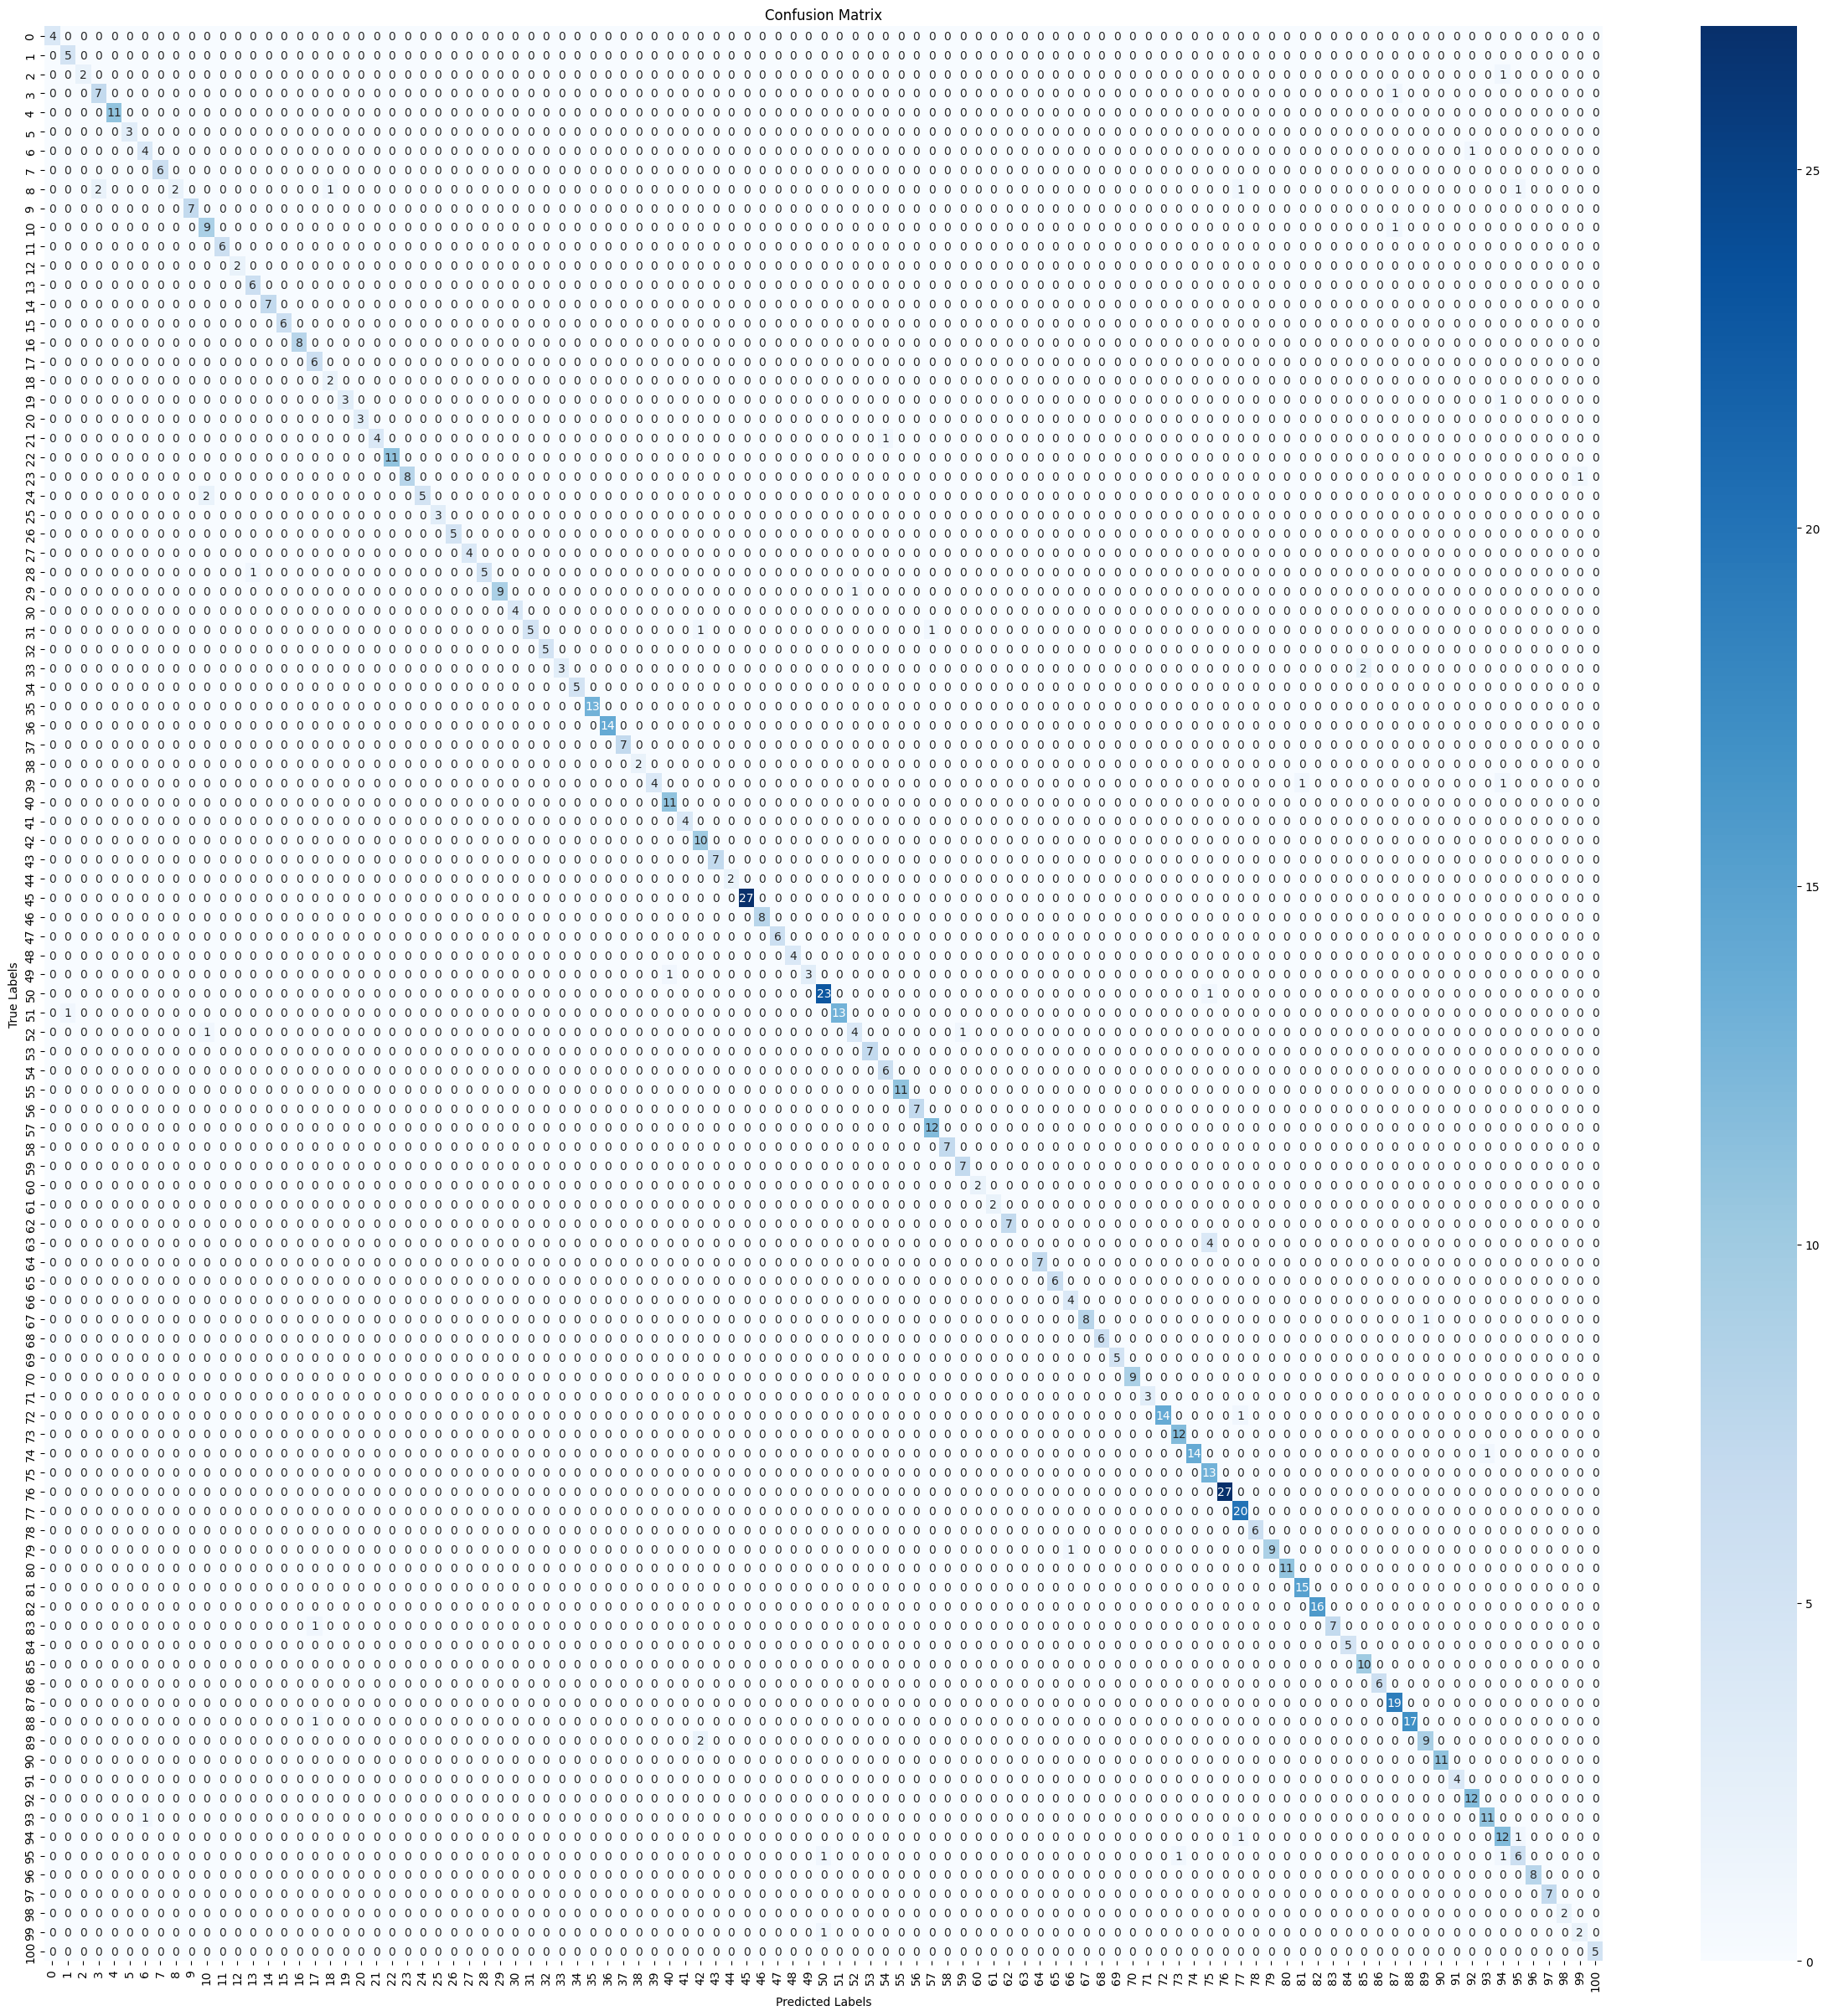

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(30,30))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
import torch

torch.save(model.state_dict(), 'model_weights.pth')
